<a href="https://colab.research.google.com/github/Azad11014/MultipleLinearRegression/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('sample_data/student_performance_synthetic.csv')
data.head()

,Attendance (%),Study Hours (per week),Parental Education Level,Family Income Level,Extracurricular Participation,Past Failures,Final Grade
0,68.727006,13.198601,1,3,1,2,27.827781
1,97.535715,2.598659,2,1,0,0,45.240757
2,86.599697,4.070946,1,2,0,0,32.750523
3,79.932924,18.072530,1,3,1,1,44.959921
4,57.800932,12.522152,2,1,1,2,23.675391


In [3]:
data.isnull().sum()

,0
Attendance (%),0
Study Hours (per week),0
Parental Education Level,0
Family Income Level,0
Extracurricular Participation,0
Past Failures,0
Final Grade,0


In [4]:
data.describe()

,Attendance (%),Study Hours (per week),Parental Education Level,Family Income Level,Extracurricular Participation,Past Failures,Final Grade
count,200.000000,200.000000,200.000000,200.000,200.00000,200.000000,200.000000
mean,74.200312,10.583128,1.875000,2.020,0.50500,1.010000,34.517676
std,14.744572,5.567023,0.838385,0.808,0.50123,0.832687,10.049977
min,50.276106,1.096170,1.000000,1.000,0.00000,0.000000,11.742614
25%,61.429121,5.967788,1.000000,1.000,0.00000,0.000000,27.753563
50%,74.724313,11.291158,2.000000,2.000,1.00000,1.000000,33.476056
75%,87.842981,15.101787,3.000000,3.000,1.00000,2.000000,41.145911
max,99.344347,19.819598,3.000000,3.000,1.00000,2.000000,64.435522


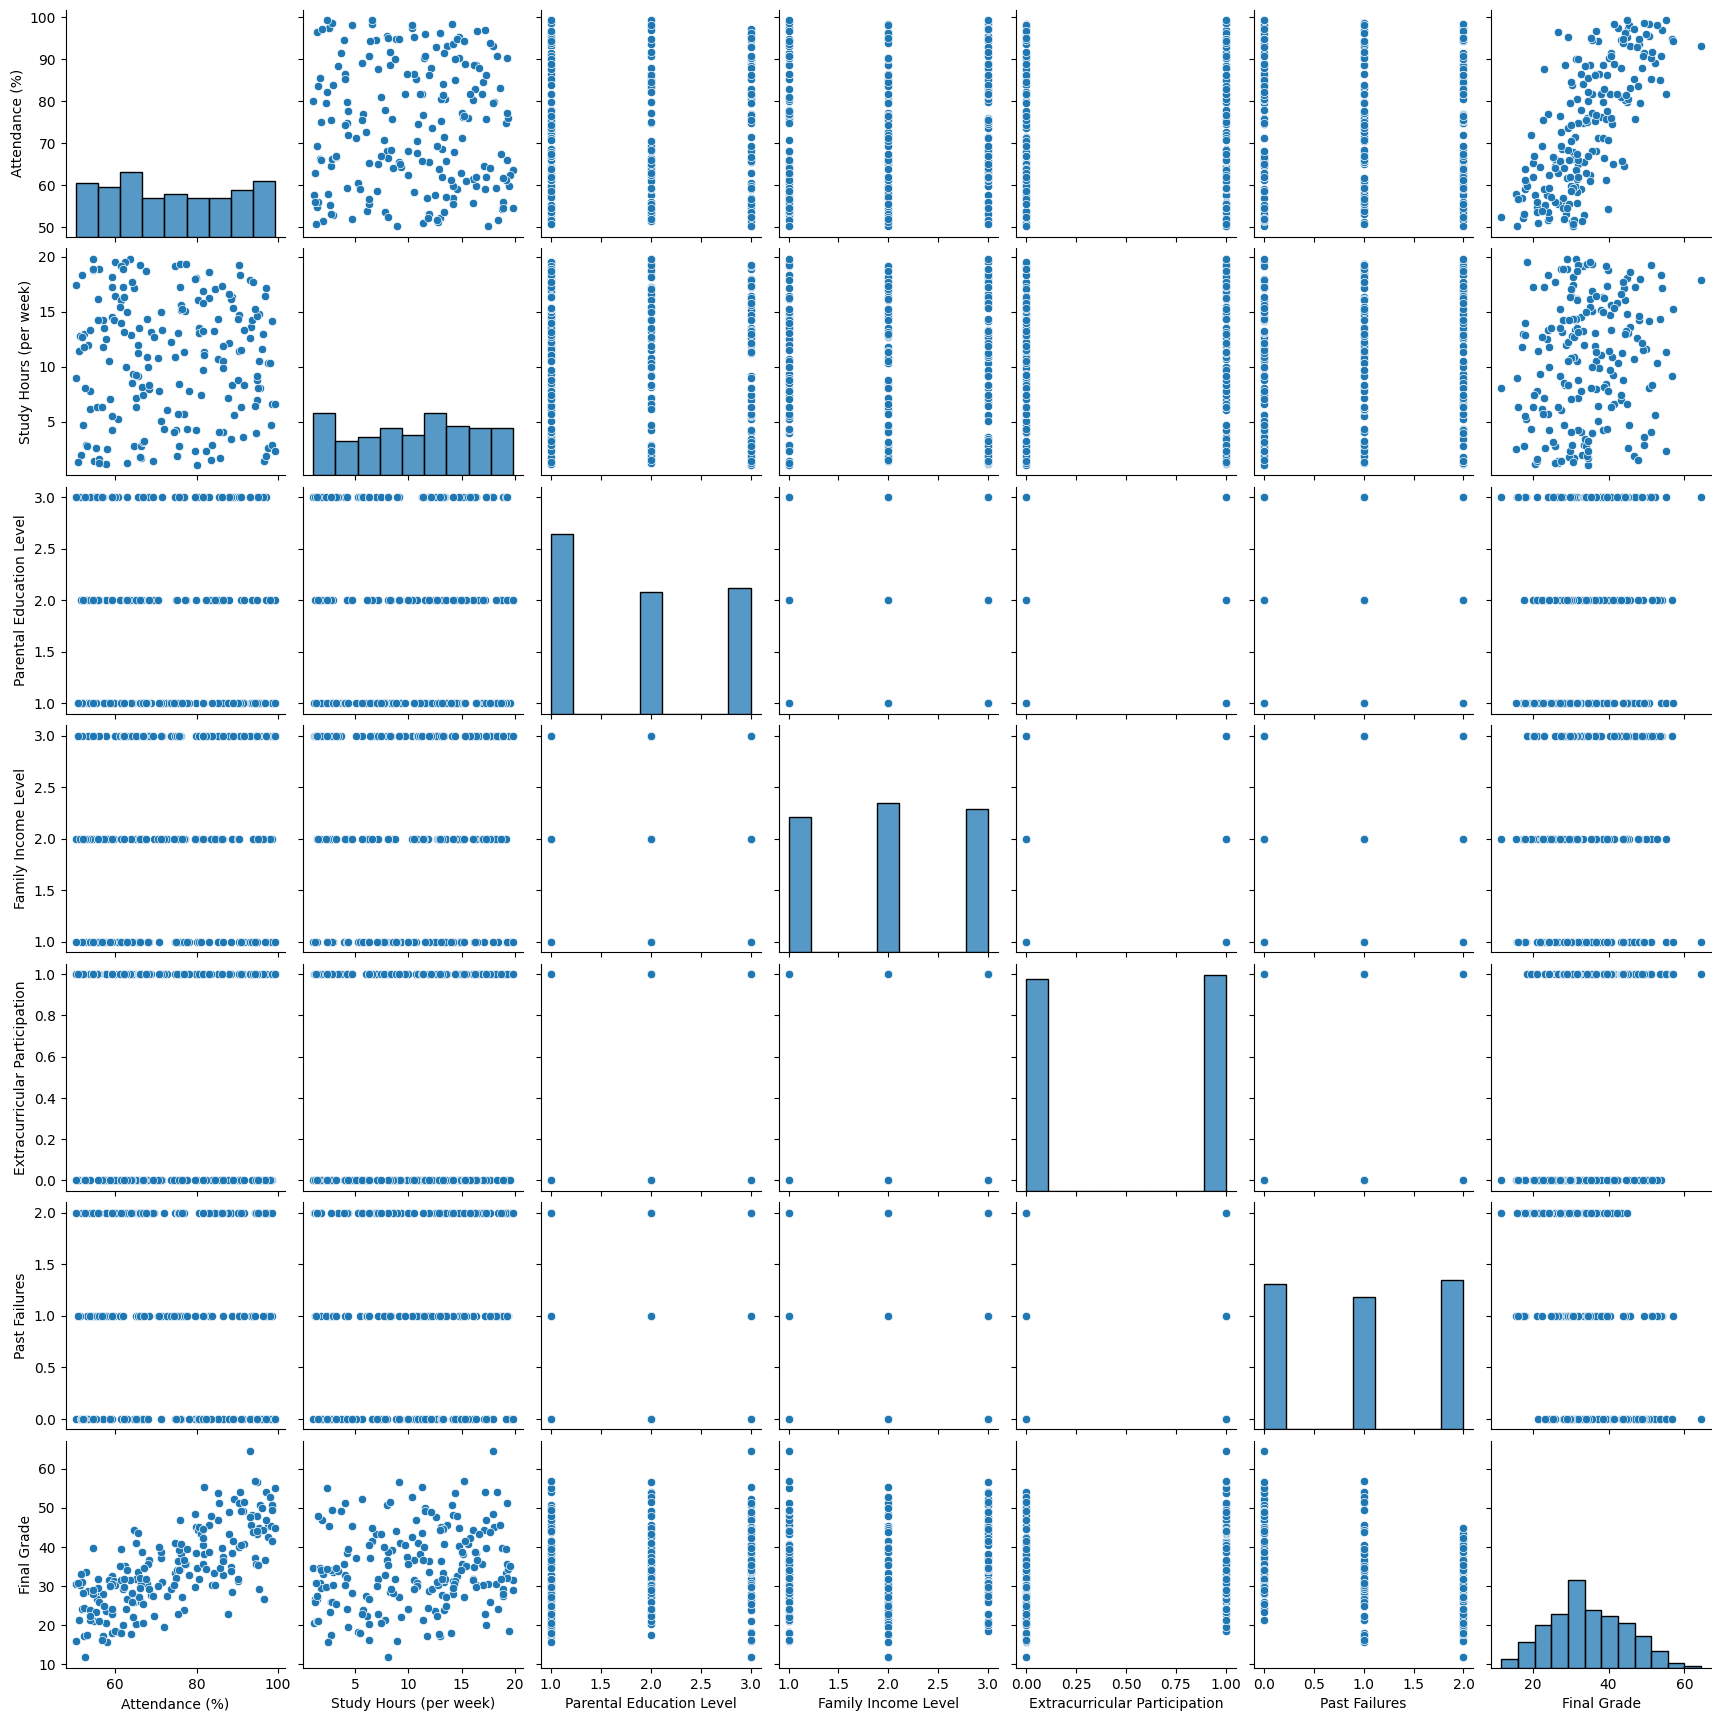

In [5]:
sns.pairplot(data)
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Extracurricular Participation'] = le.fit_transform(data['Extracurricular Participation'])


In [7]:
data.head()

,Attendance (%),Study Hours (per week),Parental Education Level,Family Income Level,Extracurricular Participation,Past Failures,Final Grade
0,68.727006,13.198601,1,3,1,2,27.827781
1,97.535715,2.598659,2,1,0,0,45.240757
2,86.599697,4.070946,1,2,0,0,32.750523
3,79.932924,18.072530,1,3,1,1,44.959921
4,57.800932,12.522152,2,1,1,2,23.675391


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Final Grade', axis=1))


In [9]:
data.head()

,Attendance (%),Study Hours (per week),Parental Education Level,Family Income Level,Extracurricular Participation,Past Failures,Final Grade
0,68.727006,13.198601,1,3,1,2,27.827781
1,97.535715,2.598659,2,1,0,0,45.240757
2,86.599697,4.070946,1,2,0,0,32.750523
3,79.932924,18.072530,1,3,1,1,44.959921
4,57.800932,12.522152,2,1,1,2,23.675391


In [10]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop('Final Grade', axis=1)
y = data['Final Grade']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
print(y_pred)

[41.34142966 24.26728652 47.83862861 28.68590262 16.35828554 47.40589096
 53.46733248 34.35247242 39.41825991 44.70584465 30.74452051 49.96084727
 41.37956606 33.4108917  39.74756968 24.74674343 29.85046343 23.92185584
 32.36629411 23.83826637 36.7224407  27.16090929 17.91158762 40.53985961
 39.85472103 26.35627365 33.76385343 39.97575781 40.2970348  19.95228079
 46.39746154 34.41965868 47.15431796 38.00469992 37.1240652  42.72315798
 24.05582696 48.99661943 24.61155083 41.80754293]


In [14]:
# Example of a new student's data (replace with actual values)
new_data = {
    'Attendance (%)': [85],
    'Study Hours (per week)': [12],
    'Parental Education Level': [2],
    'Family Income Level': [3],
    'Extracurricular Participation': [1],
    'Past Failures': [0]
}

# Convert new data into a DataFrame
new_data_df = pd.DataFrame(new_data)


In [15]:
# Assuming 'scaler' was used during training for feature scaling
scaled_new_data = scaler.transform(new_data_df)


In [16]:
# Predict final grade without saving the model
predicted_grade = model.predict(scaled_new_data)
print(f"Predicted Final Grade: {predicted_grade[0]:.2f}")


Predicted Final Grade: 4.53


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
